In [1]:
library("DESeq2")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

In [2]:
setwd('/ufrc/soltis/shan158538/TragFL_NewAnalysis/OutPut/DE_analysis/DE_Tms_Tml')

In [3]:
cts <- read.csv("DESeq2_count_matrix_Tml_Tms.csv", row.name = "FUSION_ID")

In [4]:
head(cts)

,Tml_1,Tml_2,Tml_3,Tms_1,Tms_2,Tms_3
,<int>,<int>,<int>,<int>,<int>,<int>
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1,71,58,79,63,65,63
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5,135,137,111,130,154,195
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1,26,20,9,11,30,21
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1,71,38,47,32,43,76
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3,437,337,388,362,405,497
Tpr_TRINITY_DN12798_c2_g2|Tdu_TRINITY_DN24179_c2_g3,7,49,58,84,40,93


In [5]:
coldata <- read.csv("DESeq2_Tml_Tms_sample_annotation.tsv", sep = "\t", row.names="sample")

In [6]:
coldata

,species
,<fct>
Tml_1,Tml
Tml_2,Tml
Tml_3,Tml
Tms_1,Tms
Tms_2,Tms
Tms_3,Tms


In [7]:
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [8]:
dds <- DESeqDataSetFromMatrix(countData = cts, colData = coldata, design = ~ species)

In [9]:
dds

class: DESeqDataSet 
dim: 11864 6 
metadata(1): version
assays(1): counts
rownames(11864): Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1
  Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5 ...
  Tpr_TRINITY_DN13433_c0_g3|Tdu_TRINITY_DN18599_c0_g3
  Tpr_TRINITY_DN13123_c0_g1|Tdu_TRINITY_DN19979_c3_g2
rowData names(0):
colnames(6): Tml_1 Tml_2 ... Tms_2 Tms_3
colData names(1): species

# Pre-filtering
## keep only rows that have at least 10 reads total

In [10]:
keep <- rowSums(counts(dds)) >= 10

In [11]:
dds <- dds[keep,]

In [12]:
dds

class: DESeqDataSet 
dim: 9868 6 
metadata(1): version
assays(1): counts
rownames(9868): Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1
  Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5 ...
  Tpr_TRINITY_DN14278_c2_g13|Tdu_TRINITY_DN22920_c2_g6
  Tpr_TRINITY_DN13123_c0_g1|Tdu_TRINITY_DN19979_c3_g2
rowData names(0):
colnames(6): Tml_1 Tml_2 ... Tms_2 Tms_3
colData names(1): species

# Data transformation and visualization

In [13]:
#vsd <- vst(dds, blind=FALSE)
rld <- rlog(dds, blind=TRUE)

In [14]:
#head(assay(vsd),3)
head(assay(rld),3)

,Tml_1,Tml_2,Tml_3,Tms_1,Tms_2,Tms_3
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1,6.360293,5.951013,6.222257,5.920675,6.049777,5.621061
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5,7.356449,7.135809,6.928914,6.976555,7.244641,7.031699
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1,4.676636,4.278591,3.759319,3.806120,4.596180,3.983442


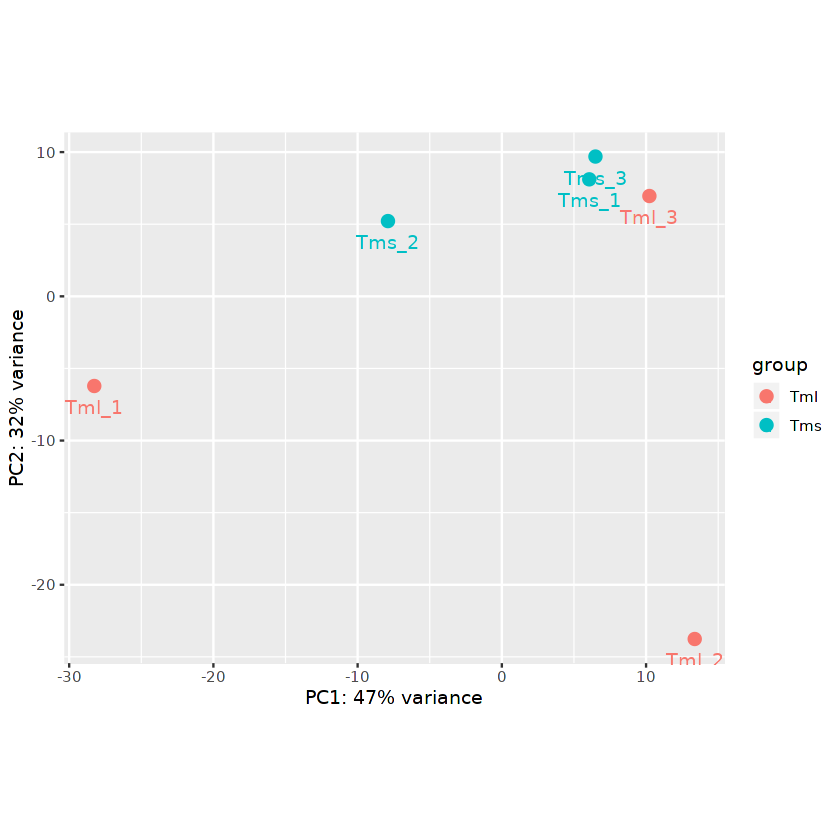

In [23]:
library(ggplot2)
plotPCA(rld, intgroup=c("species"), ntop=1000) + geom_text(aes(label=name),vjust=2)

In [16]:
rld_mat <- assay(rld)
rld_cor <- cor(rld_mat)
head(rld_cor)

,Tml_1,Tml_2,Tml_3,Tms_1,Tms_2,Tms_3
Tml_1,1.0000000,0.9455369,0.9484231,0.9516409,0.9642986,0.9492368
Tml_2,0.9455369,1.0000000,0.9715320,0.9705737,0.9634603,0.9680641
Tml_3,0.9484231,0.9715320,1.0000000,0.9877275,0.9708258,0.9831088
Tms_1,0.9516409,0.9705737,0.9877275,1.0000000,0.9801899,0.9847805
Tms_2,0.9642986,0.9634603,0.9708258,0.9801899,1.0000000,0.9736946
Tms_3,0.9492368,0.9680641,0.9831088,0.9847805,0.9736946,1.0000000


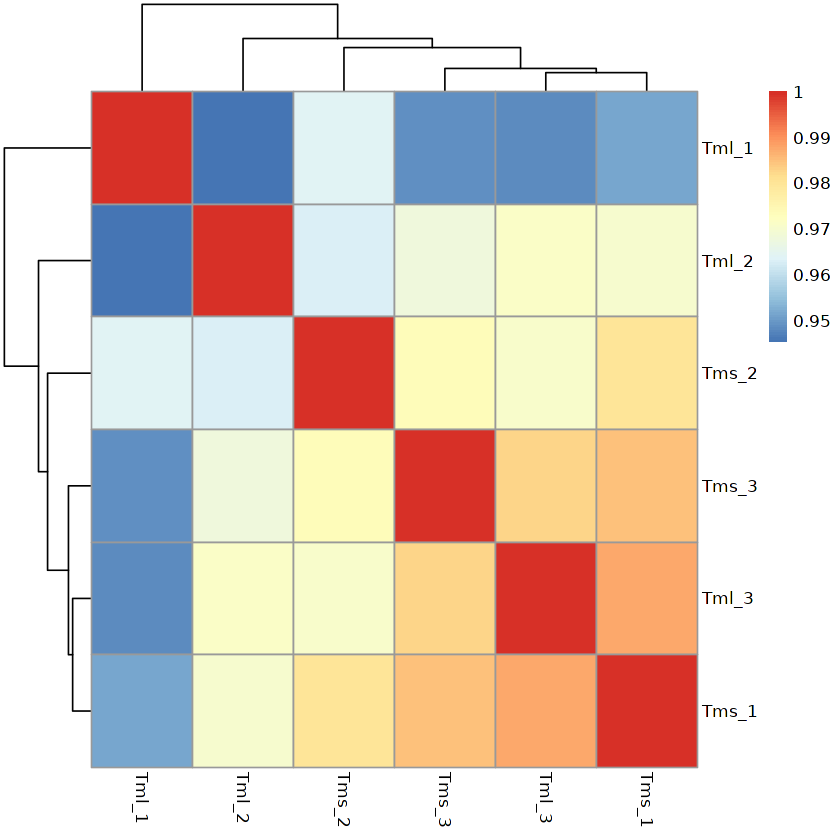

In [17]:
library("pheatmap")
pheatmap(rld_cor)